In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [0]:
googlepath = "/content/gdrive/My Drive/CSYE7374-FinalProject/"

In [3]:
import pandas as pd
import seaborn as sns
import sys
sys.path.append(googlepath)
import preprocess
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare Data

## Import Data

In [0]:
airports = pd.read_csv('{}Data/airports.csv'.format(googlepath))

In [4]:
df = pd.read_csv('{}Data/flights.csv'.format(googlepath))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.shape

(5819079, 31)

In [0]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data

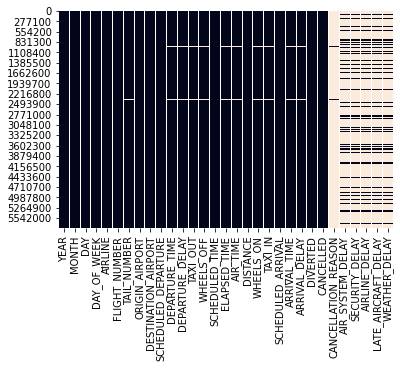

In [0]:
sns.heatmap(df.isnull(), cbar=False)

In [0]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)

In [0]:
df.dropna(inplace = True)

## Data Format

In [0]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [0]:
df['SCHEDULED_DEPARTURE'] = preprocess.create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(preprocess.format_heure)

In [0]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE
0,2015,1,1,4,AS,ANC,SEA,2015-01-01 00:05:00,2354.0,-11.0,205.0,194.0,1448,04:30:00,408.0,-22.0,2015-01-01
1,2015,1,1,4,AA,LAX,PBI,2015-01-01 00:10:00,2.0,-8.0,280.0,279.0,2330,07:50:00,741.0,-9.0,2015-01-01
2,2015,1,1,4,US,SFO,CLT,2015-01-01 00:20:00,18.0,-2.0,286.0,293.0,2296,08:06:00,811.0,5.0,2015-01-01
3,2015,1,1,4,AA,LAX,MIA,2015-01-01 00:20:00,15.0,-5.0,285.0,281.0,2342,08:05:00,756.0,-9.0,2015-01-01
4,2015,1,1,4,AS,SEA,ANC,2015-01-01 00:25:00,24.0,-1.0,235.0,215.0,1448,03:20:00,259.0,-21.0,2015-01-01


In [0]:
df['SCHEDULED_DEPARTURE']= pd.to_datetime(df['SCHEDULED_DEPARTURE']) 

In [0]:
# Airlines which are delayed more than 15 minues wii be considered as Delay.
df['delayed'] = df.DEPARTURE_DELAY.apply(lambda x: 1 if x > 15 else 0)

In [0]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,delayed
0,2015,1,1,4,AS,ANC,SEA,2015-01-01 00:05:00,2354.0,-11.0,205.0,194.0,1448,04:30:00,408.0,-22.0,2015-01-01,0
1,2015,1,1,4,AA,LAX,PBI,2015-01-01 00:10:00,2.0,-8.0,280.0,279.0,2330,07:50:00,741.0,-9.0,2015-01-01,0
2,2015,1,1,4,US,SFO,CLT,2015-01-01 00:20:00,18.0,-2.0,286.0,293.0,2296,08:06:00,811.0,5.0,2015-01-01,0
3,2015,1,1,4,AA,LAX,MIA,2015-01-01 00:20:00,15.0,-5.0,285.0,281.0,2342,08:05:00,756.0,-9.0,2015-01-01,0
4,2015,1,1,4,AS,SEA,ANC,2015-01-01 00:25:00,24.0,-1.0,235.0,215.0,1448,03:20:00,259.0,-21.0,2015-01-01,0


In [0]:
df.to_csv('{}Data/dataframe.csv'.format(googlepath))

In [4]:
df = pd.read_csv('{}Data/dataframe.csv'.format(googlepath))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['delayed'],axis=1), train.delayed, 
                                                    test_size=0.33, random_state=42, stratify=train.delayed)

In [0]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,delayed
0,2015,1,1,4,AS,ANC,SEA,2015-01-01 00:05:00,2354.0,-11.0,205.0,194.0,1448,04:30:00,408.0,-22.0,2015-01-01 00:00:00,0
1,2015,1,1,4,AA,LAX,PBI,2015-01-01 00:10:00,2.0,-8.0,280.0,279.0,2330,07:50:00,741.0,-9.0,2015-01-01 00:00:00,0
2,2015,1,1,4,US,SFO,CLT,2015-01-01 00:20:00,18.0,-2.0,286.0,293.0,2296,08:06:00,811.0,5.0,2015-01-01 00:00:00,0
3,2015,1,1,4,AA,LAX,MIA,2015-01-01 00:20:00,15.0,-5.0,285.0,281.0,2342,08:05:00,756.0,-9.0,2015-01-01 00:00:00,0
4,2015,1,1,4,AS,SEA,ANC,2015-01-01 00:25:00,24.0,-1.0,235.0,215.0,1448,03:20:00,259.0,-21.0,2015-01-01 00:00:00,0


# Data Exploration 

## Canceled Flights

In [0]:
total_count = df['AIRLINE'].count()
cancelled_count = df[df['CANCELLED'] == 1]['AIRLINE'].count()

print('Total flights', total_count, 'and Cancelled flights',cancelled_count, '. So % of cancelled flights: ', round(cancelled_count/total_count*100,2) ,'%')

Total flights 5819079 and Cancelled flights 89884 . So % of cancelled flights:  1.54 %


There are only few Flights are canceled, so we can ignore them.

## Delay VS Month

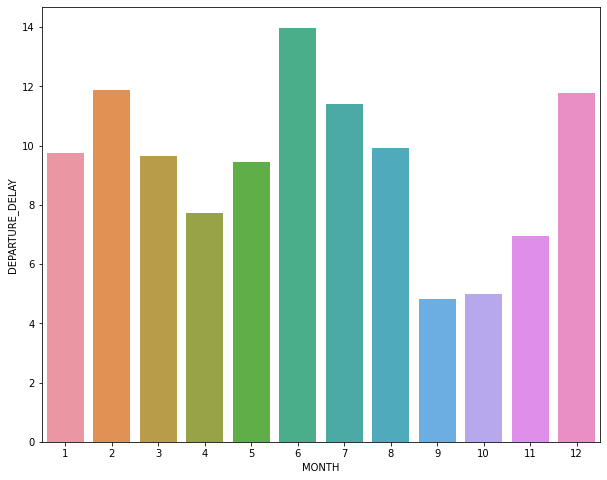

In [0]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=df, x='MONTH',y='DEPARTURE_DELAY', ax=ax, ci=None)

## Delay VS Airlines

In [0]:
airlines = pd.read_csv('{}Data/airlines.csv'.format(googlepath))
companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

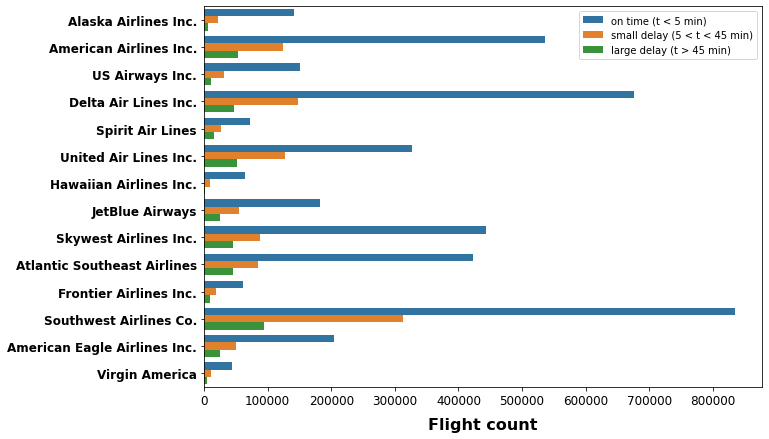

In [7]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

labels = [companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [8]:
total = df['AIRLINE'].count()
ontime = df[df['DELAY_LEVEL'] == 0]['AIRLINE'].count()
pct_ontime = ontime/total*100
print('Ontime%: ',pct_ontime)

small_delay = df[df['DELAY_LEVEL'] == 1]['AIRLINE'].count()
pct_small_delay = small_delay/total*100
print('Small delay%: ', pct_small_delay)


large = df[df['DELAY_LEVEL'] == 2]['AIRLINE'].count()
pct_large = large/total*100
print('Large delay%: ', pct_large)

Ontime%:  72.82271918415235
Small delay%:  19.481071780088513
Large delay%:  7.696209035759138


## Others

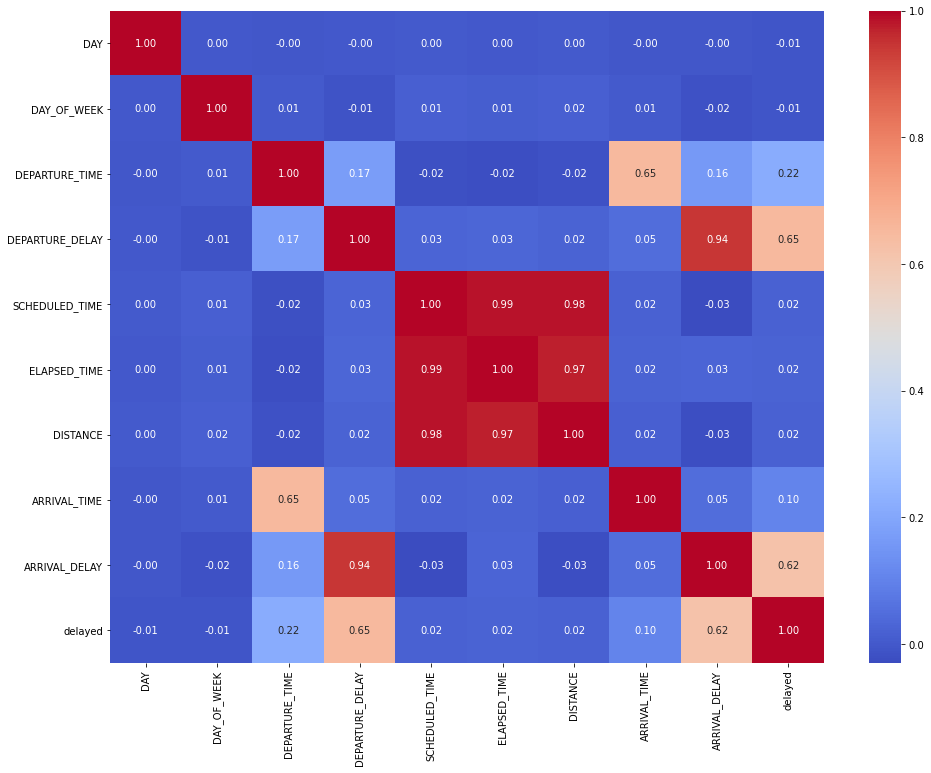

In [0]:
# Show corr of all columns in df
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

# Make Training Dataset

In [0]:
train = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_TIME', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'delayed']] 

In [0]:
train.head()

,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_TIME,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,delayed
0,1,1,4,2354.0,AS,ANC,SEA,1448,0
1,1,1,4,2.0,AA,LAX,PBI,2330,0
2,1,1,4,18.0,US,SFO,CLT,2296,0
3,1,1,4,15.0,AA,LAX,MIA,2342,0
4,1,1,4,24.0,AS,SEA,ANC,1448,0


In [0]:
origin_list = train.ORIGIN_AIRPORT.value_counts().head(100).index.tolist()
train['Origin'] = train.ORIGIN_AIRPORT.apply(lambda x: x if x in origin_list else 'other')

dest_list = train.DESTINATION_AIRPORT.value_counts().head(100).index.tolist()
train['Dest'] = train.DESTINATION_AIRPORT.apply(lambda x: x if x in dest_list else 'other')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
train.drop(columns = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train.to_csv('./Data/train.csv')